In [880]:
#libraries import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from python_utils import *
import copy
import math

In [881]:
df_heart = pd.read_csv("/Users/hussamuddin/Downloads/archive/heart.csv")

In [882]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [883]:
print("the shape of the heart dataset is: ", df_heart.shape)


the shape of the heart dataset is:  (303, 14)


In [884]:
df_y = df_heart['output']
df_x = df_heart.drop('output',axis=1)

In [885]:
df_x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [886]:
df_y.dtype

dtype('int64')

In [887]:
from sklearn.model_selection import train_test_split

In [888]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [889]:
x_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3


In [890]:
print ('The shape of X_train is: ' + str(x_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (203, 13)
The shape of y_train is: (203,)
We have m = 203 training examples


In [891]:
dict = {}
for i in list(x_train.columns):
    dict[i] = x_train[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,38
sex,2
cp,4
trtbps,40
chol,130
fbs,2
restecg,3
thalachh,77
exng,2
oldpeak,35


In [892]:
x_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,203.0,54.650246,9.019826,34.0,48.0,56.0,61.0,77.0
sex,203.0,0.660099,0.474846,0.0,0.0,1.0,1.0,1.0
cp,203.0,1.009852,1.043557,0.0,0.0,1.0,2.0,3.0
trtbps,203.0,130.812808,17.071615,94.0,120.0,130.0,140.0,192.0
chol,203.0,248.448276,55.012339,131.0,211.5,243.0,277.0,564.0
fbs,203.0,0.128079,0.335004,0.0,0.0,0.0,0.0,1.0
restecg,203.0,0.527094,0.529342,0.0,0.0,1.0,1.0,2.0
thalachh,203.0,149.655172,22.672426,88.0,134.5,153.0,166.5,195.0
exng,203.0,0.330049,0.471393,0.0,0.0,0.0,1.0,1.0
oldpeak,203.0,1.033005,1.101908,0.0,0.0,0.8,1.6,5.6


In [893]:
x_train.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

In [894]:
df_corr = df_heart.corr().transpose()
df_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


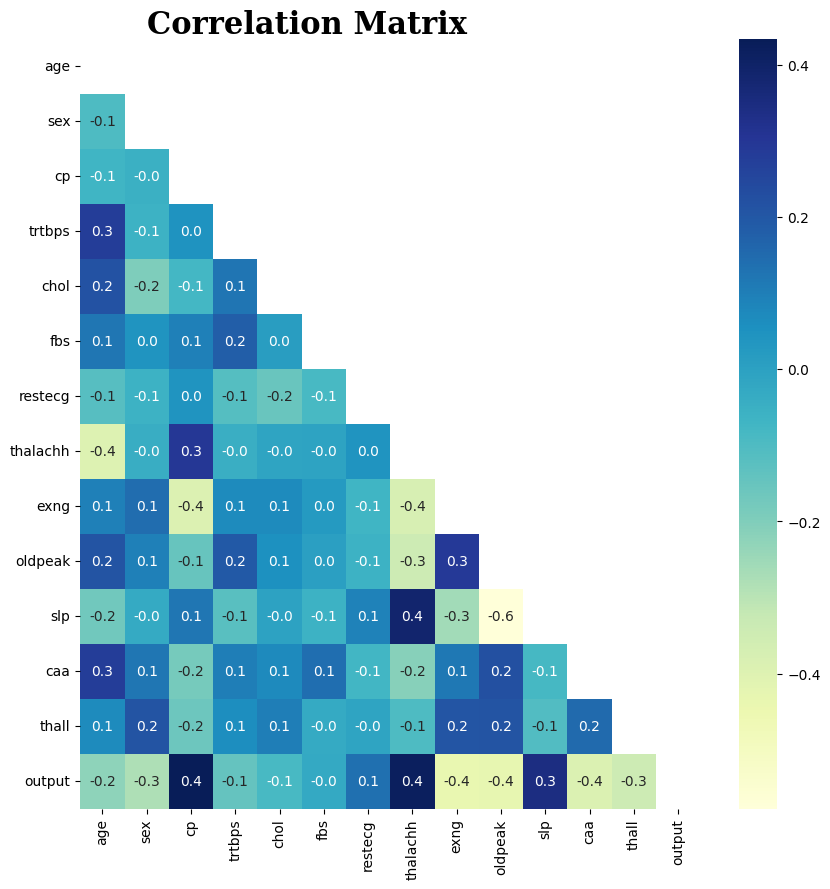

In [895]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df_heart.corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [896]:
type(x_train)

pandas.core.frame.DataFrame

In [897]:
from sklearn import preprocessing
scaler = preprocessing.PowerTransformer()
x_train = scaler.fit_transform(x_train)

In [898]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [899]:
#test sigmoid funtion
value = 0
print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [900]:
#defining a cost function 
def cost_func(x,y,w,b,*argv):
    m , n = x.shape
    z=np.zeros(m)
    g=np.zeros(m)
    loss=np.zeros(m)
    total_cost=0

    for i in range(m):
        for j in range (n):
            z[i]+=w[j]*x[i,j]
        z[i]+=b    
        g[i]=sigmoid(z[i])
        loss[i]=(-y[i]*np.log(g[i])-(1-y[i])*np.log(1-g[i]))
        total_cost+=loss[i]
    total_cost/=m
    return total_cost     

In [901]:
print(x_train.shape)
type(y_train)
y_train = y_train.to_numpy()


(203, 13)


In [902]:
m,n=x_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = cost_func(x_train, y_train, initial_w, initial_b)
#print(initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [903]:
test_w = np.array([-0.5,-0.15,0.65,-0.3,-0.3,0.1,0.3,0.65,-0.65,-0.65,0.45,-0.66,-0.45])
test_b = 0.4
cost = cost_func(x_train, y_train, test_w, test_b)
print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.412


In [904]:
#gradient descent algorithm
def grad_find(x,y,w,b,*argv):
    m,n=x.shape
    z=np.zeros(m)
    g=np.zeros(m)
    dj_db=0.
    dj_dw=np.zeros(w.shape)
    for i in range(m):
        for j in range(n):
            z[i]=w[j]*x[i][j]
        z[i]+=b
        g[i]=sigmoid(z[i])
        dj_db+=g[i]-y[i]
        for k in range(n):
            dj_dw[k]+=(g[i]-y[i])*x[i][k]
    dj_dw/=m
    dj_db/=m
    return dj_db, dj_dw

In [905]:
initial_w = np.zeros(13)
initial_b = 0.

dj_db, dj_dw = grad_find(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.027093596059113302
dj_dw at initial w and b (zeros):[0.09631224559912682, 0.15215403250314932, -0.24575643914452383, 0.012015771520056435, 0.01994897089496858, -0.019097934671438905, -0.04135065930600252, -0.1968851747474208, 0.2232975724643236, 0.20088584697894227, -0.1759491734512199, 0.2604830359124634, 0.20449161447384703]


In [906]:
test_w = np.array([-0.2,-0.3,0.4,-0.1,-0.1,0,0.1,0.4,-0.4,-0.4,0.3,-0.4,-0.3])
test_b = -2
dj_db, dj_dw  = grad_find(x_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

dj_db at test w and b: -0.40429841218786766
dj_dw at test w and b: [0.09459765336648904, 0.14534675678630252, -0.23911116330102383, 0.011228525829063729, 0.018585462165793112, -0.016966462889073875, -0.042957729262683195, -0.1937996871117269, 0.21624959884481038, 0.1927053809163333, -0.1722564778035986, 0.2556511672429942, 0.17239689006438036]


In [907]:
def gradient_descent(x ,y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(x)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(x, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<15000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [908]:
initial_w = np.array([-0.2,-0.3,0.4,-0.1,-0.1,0,0.1,0.4,-0.4,-0.4,0.3,-0.4,-0.3])
initial_b = .4

# Some gradient descent settings
iterations = 100
alpha = 0.001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   cost_func, grad_find, alpha, iterations, 0)

Iteration    0: Cost     0.39   
Iteration   10: Cost     0.39   
Iteration   20: Cost     0.39   
Iteration   30: Cost     0.39   
Iteration   40: Cost     0.39   
Iteration   50: Cost     0.38   
Iteration   60: Cost     0.38   
Iteration   70: Cost     0.38   
Iteration   80: Cost     0.38   
Iteration   90: Cost     0.38   
Iteration   99: Cost     0.38   


In [909]:
def predict(x, w, b): 
    m, n = x.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*x[i,j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        if(f_wb>=0.5):
            p[i]=1
        else: 
            p[i]=0
        
    return p

In [910]:
tmp_w = np.random.randn(13)
tmp_b = 0.3    
tmp_X = np.random.randn(13, 1) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

Output of predict: shape (13,), value [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]


In [911]:
p = predict(x_train, w,b)
print(w)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

[-0.20913656 -0.31338489  0.42289325 -0.10097551 -0.10176736  0.00148033
  0.10446543  0.41868235 -0.42053001 -0.41797814  0.31650873 -0.42482825
 -0.31319135]
Train Accuracy: 82.266010


In [912]:

x_test = scaler.fit_transform(x_test)
p = predict(x_test, w,b)
print(w)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))

[-0.20913656 -0.31338489  0.42289325 -0.10097551 -0.10176736  0.00148033
  0.10446543  0.41868235 -0.42053001 -0.41797814  0.31650873 -0.42482825
 -0.31319135]
Test Accuracy: 85.000000


In [913]:
from sklearn.linear_model import LogisticRegression